<a href="https://colab.research.google.com/github/Lsanmart73/Challenger-Telecom-XChallenger-Telecom-X2/blob/main/TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Extracción de Archivo Tratado***

In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
datos = pd.read_csv('/content/datos_procesados.csv',sep=';')

In [105]:
# Escalar variables numéricas
datos_scaled = datos.copy()
cols_to_scale = ['Meses_contrato', 'Cuentas_mensuales', 'Cuentas_totales', 'Cuentas_diarias']
scaler = StandardScaler()
datos_scaled[cols_to_scale] = scaler.fit_transform(datos_scaled[cols_to_scale])

In [106]:
datos

,id_cliente,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,Servicio_internet,...,Streaming_TV,Streaming_peliculas,Tipo_contrato,Facturacion_electronica,Metodo_pago,Cuentas_mensuales,Cuentas_totales,internet_InternetService_activo,cantidad_servicios,Cuentas_diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.60,593.30,1,5,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.90,542.40,1,4,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.90,280.85,1,3,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1,6,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.90,267.40,1,4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,1,0,0,0,13,1,0,DSL,...,0,0,One year,0,Mailed check,55.15,742.90,1,4,1.838333
7252,9992-RRAMN,1,0,0,1,0,22,1,1,Fiber optic,...,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1,4,2.836667
7253,9992-UJOEL,0,0,0,0,0,2,1,0,DSL,...,0,0,Month-to-month,1,Mailed check,50.30,92.75,1,3,1.676667
7254,9993-LHIEB,0,0,0,1,1,67,1,0,DSL,...,0,1,Two year,0,Mailed check,67.85,4627.65,1,6,2.261667


In [107]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7256 non-null   object 
 1   Cancelacion                      7256 non-null   int64  
 2   Género                           7256 non-null   int64  
 3   Jubilado                         7256 non-null   int64  
 4   Pareja                           7256 non-null   int64  
 5   Dependientes                     7256 non-null   int64  
 6   Meses_contrato                   7256 non-null   int64  
 7   Servicio_telefonico              7256 non-null   int64  
 8   Multiples_lineas                 7256 non-null   int64  
 9   Servicio_internet                7256 non-null   object 
 10  Seguridad_Ol                     7256 non-null   int64  
 11  Backup_Ol                        7256 non-null   int64  
 12  Proteccion_dispositi

In [38]:
datos.isnull().sum()

,0
Cancelacion,0
Género,0
Jubilado,0
Pareja,0
Dependientes,0
Meses_contrato,0
Servicio_telefonico,0
Multiples_lineas,0
DSL,0
Fibra_optica,0


### ***Eliminación de las Columnas Irrelevantes***

In [108]:
print(datos.nunique().sort_values())

Cancelacion                           2
Género                                2
Jubilado                              2
Pareja                                2
Servicio_telefonico                   2
Dependientes                          2
Seguridad_Ol                          2
Multiples_lineas                      2
Streaming_TV                          2
Soporte_tecnico                       2
Backup_Ol                             2
Proteccion_dispositivo                2
Streaming_peliculas                   2
Facturacion_electronica               2
internet_InternetService_activo       2
Servicio_internet                     3
Tipo_contrato                         3
Metodo_pago                           4
cantidad_servicios                    9
Meses_contrato                       72
Cuentas_diarias                    1584
Cuentas_mensuales                  1584
Cuentas_totales                    6530
id_cliente                         7256
dtype: int64


In [109]:
columnas_unicas = [col for col in datos.columns if datos[col].nunique() == 1]
print(f'Las columnas con valores únicos son: {columnas_unicas}')

Las columnas con valores únicos son: []


In [112]:
correlacion = datos.select_dtypes(include=['float64', 'int64']).corr().abs()
correlacion

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,Seguridad_Ol,Backup_Ol,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_peliculas,Facturacion_electronica,Cuentas_mensuales,Cuentas_totales,internet_InternetService_activo,cantidad_servicios,Cuentas_diarias
Cancelacion,1.000000,0.009494,0.146400,0.148106,0.160347,0.345799,0.012337,0.039277,0.166865,0.080211,0.063479,0.160476,0.062456,0.060092,0.186309,0.189393,0.194440,0.223755,0.017924,0.189393
Género,0.009494,1.000000,0.004239,0.004593,0.011884,0.005936,0.006065,0.008259,0.016301,0.012834,0.001483,0.008428,0.007222,0.012109,0.011417,0.013126,0.000488,0.005082,0.015292,0.013126
Jubilado,0.146400,0.004239,1.000000,0.023439,0.212338,0.017333,0.009885,0.144615,0.037877,0.068915,0.060443,0.059327,0.103719,0.119049,0.157470,0.220098,0.103499,0.182481,0.119076,0.220098
Pareja,0.148106,0.004593,0.023439,1.000000,0.448500,0.379684,0.019496,0.141673,0.141620,0.139859,0.152983,0.116421,0.124575,0.116399,0.010303,0.098064,0.316918,0.000448,0.194140,0.098064
Dependientes,0.160347,0.011884,0.212338,0.448500,1.000000,0.163444,0.003212,0.027691,0.083775,0.023654,0.014733,0.062373,0.014971,0.038832,0.110541,0.114345,0.063960,0.140906,0.006290,0.114345
Meses_contrato,0.345799,0.005936,0.017333,0.379684,0.163444,1.000000,0.009661,0.332121,0.328315,0.362128,0.362639,0.323171,0.281232,0.286157,0.006662,0.246981,0.825118,0.035545,0.474168,0.246981
Servicio_telefonico,0.012337,0.006065,0.009885,0.019496,0.003212,0.009661,1.000000,0.280225,0.092164,0.051992,0.071922,0.096413,0.024215,0.034847,0.013804,0.247323,0.113791,0.172730,0.082308,0.247323
Multiples_lineas,0.039277,0.008259,0.144615,0.141673,0.027691,0.332121,0.280225,1.000000,0.098866,0.205152,0.202752,0.097904,0.258037,0.259698,0.163434,0.491162,0.468926,0.210138,0.518031,0.491162
Seguridad_Ol,0.166865,0.016301,0.037877,0.141620,0.083775,0.328315,0.092164,0.098866,1.000000,0.285905,0.275152,0.355656,0.176661,0.189913,0.002091,0.298169,0.413705,0.333107,0.526052,0.298169
Backup_Ol,0.080211,0.012834,0.068915,0.139859,0.023654,0.362128,0.051992,0.205152,0.285905,1.000000,0.306196,0.291907,0.282707,0.276812,0.131506,0.442733,0.512878,0.381748,0.604255,0.442733


In [148]:
datos_reducido = datos.drop(columns = ['id_cliente', 'Cuentas_diarias', 'Servicio_telefonico', 'Género'])
datos_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cancelacion                      7256 non-null   int64  
 1   Jubilado                         7256 non-null   int64  
 2   Pareja                           7256 non-null   int64  
 3   Dependientes                     7256 non-null   int64  
 4   Meses_contrato                   7256 non-null   int64  
 5   Multiples_lineas                 7256 non-null   int64  
 6   Servicio_internet                7256 non-null   object 
 7   Seguridad_Ol                     7256 non-null   int64  
 8   Backup_Ol                        7256 non-null   int64  
 9   Proteccion_dispositivo           7256 non-null   int64  
 10  Soporte_tecnico                  7256 non-null   int64  
 11  Streaming_TV                     7256 non-null   int64  
 12  Streaming_peliculas 

### ***Verificación de la Proporción de Cancelación***

In [149]:
print("Columnas disponibles:", datos_reducido.columns.tolist())

Columnas disponibles: ['Cancelacion', 'Jubilado', 'Pareja', 'Dependientes', 'Meses_contrato', 'Multiples_lineas', 'Servicio_internet', 'Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo', 'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas', 'Tipo_contrato', 'Facturacion_electronica', 'Metodo_pago', 'Cuentas_mensuales', 'Cuentas_totales', 'internet_InternetService_activo', 'cantidad_servicios']


In [150]:
datos.to_csv('datos_reducido.csv', index=False, sep=';')

In [151]:
col_target = 'Cancelacion'

In [152]:
if col_target not in datos.columns:
    raise ValueError(f"La columna '{col_target}' no existe. Revisa el nombre correcto.")

In [153]:
proporciones = datos[col_target].value_counts(normalize=True)
conteo = datos[col_target].value_counts()
print("\n📊 Distribución de clases:")
for clase in conteo.index:
    porcentaje = proporciones[clase] * 100
    etiqueta = "Cancelados" if clase == 1 else "Activos"
    print(f"{etiqueta} ({clase}): {conteo[clase]} clientes ({porcentaje:.2f}%)")


📊 Distribución de clases:
Activos (0): 5387 clientes (74.24%)
Cancelados (1): 1869 clientes (25.76%)


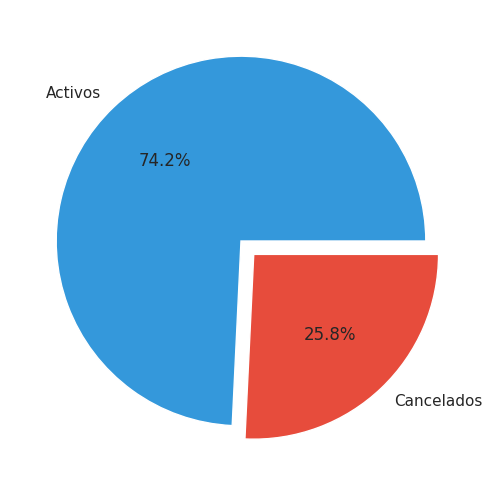

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de distribución de clases
clases = ['Activos', 'Cancelados']
porcentajes = [74.24, 25.76]

# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de pastel (Pie Chart)
plt.pie(porcentajes,
        labels=clases,
        autopct='%1.1f%%',
        colors=['#3498db', '#e74c3c'],
        explode=(0, 0.1))  # Separar ligeramente la clase de abandono

plt.show()

In [155]:
datos.describe(include='object')

,id_cliente,Servicio_internet,Tipo_contrato,Metodo_pago
count,7256,7256,7256,7256
unique,7256,3,3,4
top,9995-HOTOH,Fiber optic,Month-to-month,Electronic check
freq,1,3198,4005,2445


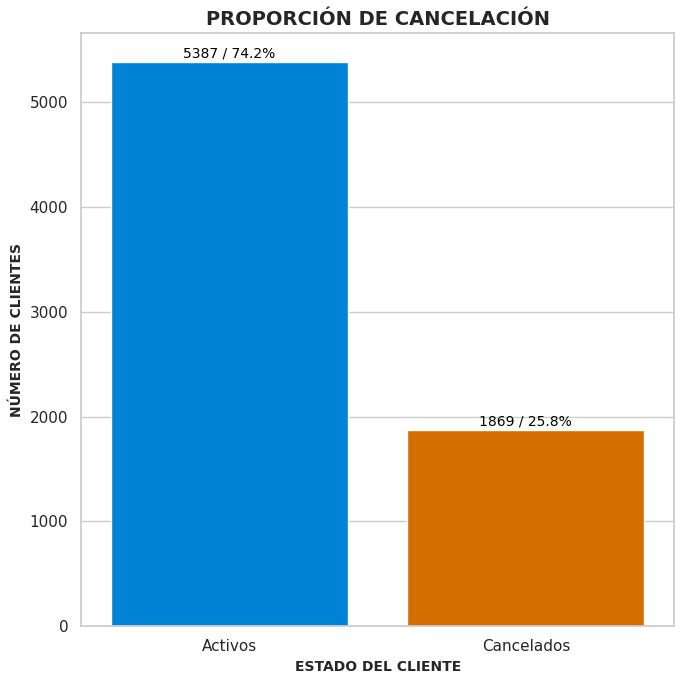

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

valores = datos_reducido['Cancelacion'].value_counts()
porcentajes = datos_reducido['Cancelacion'].value_counts(normalize=True) * 100

df_aux = datos_reducido['Cancelacion'].map({0: 'Activos', 1: 'Cancelados'}).to_frame(name='Estado')
sns.set_style("whitegrid")
plt.figure(figsize=(7, 7))
colores = ['#0083d5', '#d56e00']

ax = sns.countplot(x='Estado', data=df_aux, color=None)
for patch, color in zip(ax.patches, colores):
    patch.set_facecolor(color)

plt.title('PROPORCIÓN DE CANCELACIÓN', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('ESTADO DEL CLIENTE', fontsize=10, fontweight='bold')
plt.ylabel('NÚMERO DE CLIENTES', fontsize=10, fontweight='bold')

for p in ax.patches:
    cantidad = int(p.get_height())
    porcentaje = cantidad / len(datos_reducido['Cancelacion']) * 100
    ax.annotate(f'{cantidad} / {porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 1), textcoords='offset points')

plt.tight_layout()
plt.show()

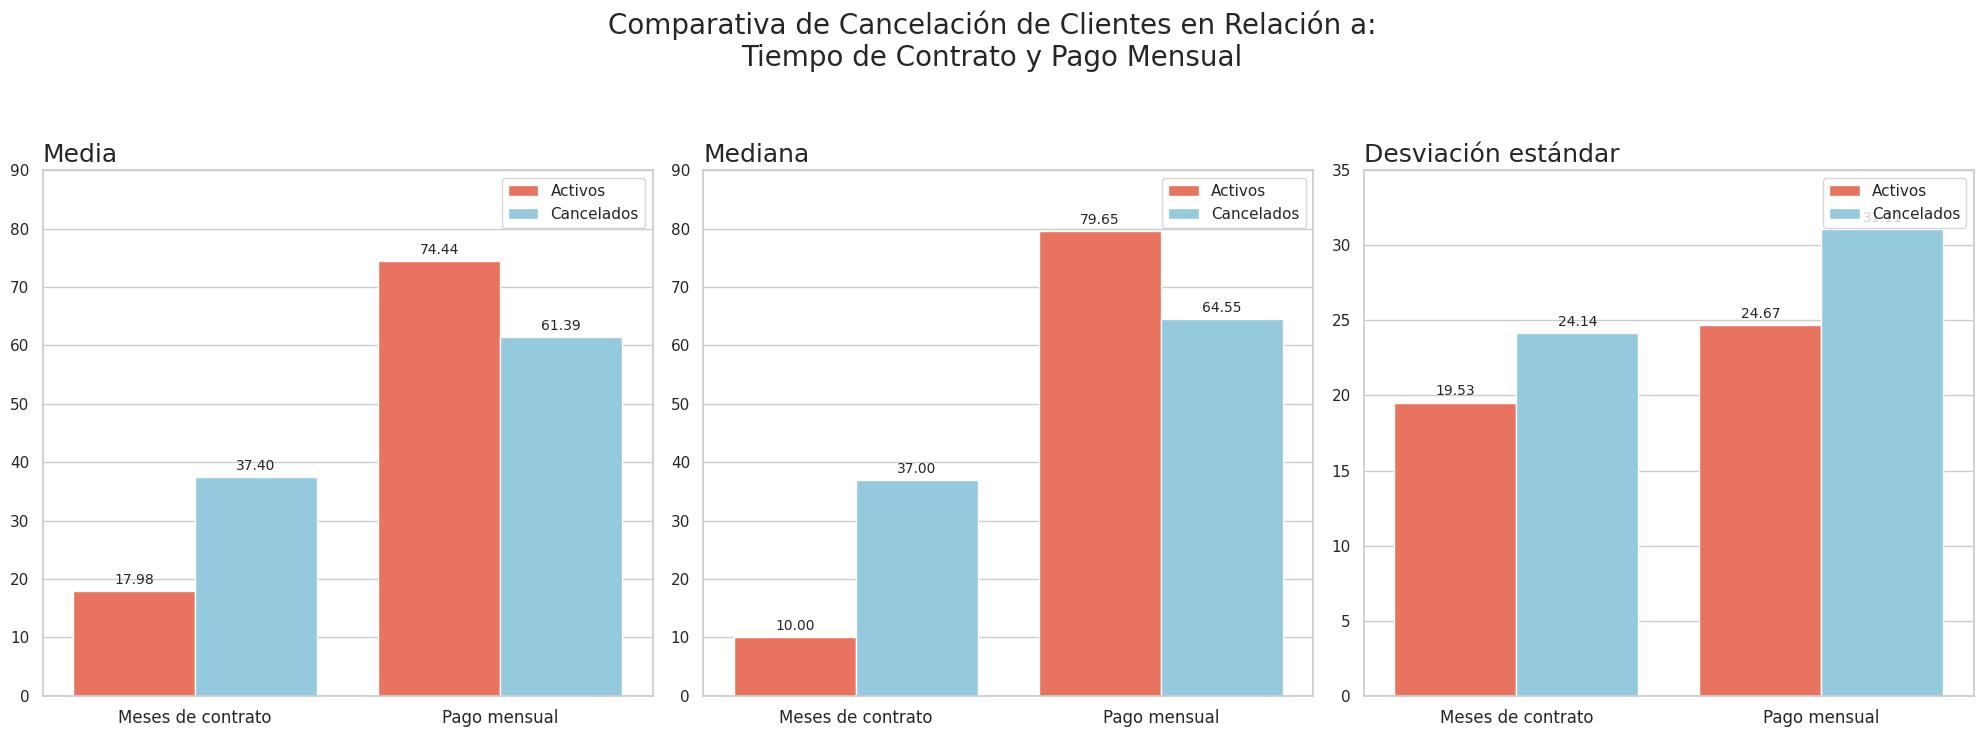

In [157]:
# Configuración de estilo
sns.set_theme(style="whitegrid", font_scale=1.2)
sns.set_context("notebook")

# Variables a analizar
columnas = ['Meses_contrato', 'Cuentas_mensuales']
nombres_columnas = {
    'Meses_contrato': 'Meses de contrato',
    'Cuentas_mensuales': 'Pago mensual',

    }

# Función para calcular media, mediana y std
def calcular_estadisticas(df, columnas):
    resumen = []
    for col in columnas:
        for grupo, etiqueta in [(1, 'Activos'), (0, 'Cancelados')]:
            datos = df[df['Cancelacion'] == grupo][col]
            resumen.extend([
                ['Media', col, etiqueta, datos.mean()],
                ['Mediana', col, etiqueta, datos.median()],
                ['Desviación estándar', col, etiqueta, datos.std()]
            ])
    return pd.DataFrame(resumen, columns=['Estadística', 'Variable', 'Grupo', 'Valor'])

# Calcular resumen
df_estadisticas = calcular_estadisticas(datos, columnas)

# Preparar figura
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
colores = {'Activos': 'tomato', 'Cancelados': 'skyblue'}
estadisticas = ['Media', 'Mediana', 'Desviación estándar']

# Crear gráficos
for i, estadistica in enumerate(estadisticas):
    ax = axes[i]
    datos_plot = df_estadisticas[df_estadisticas['Estadística'] == estadistica].copy()
    datos_plot['Variable'] = datos_plot['Variable'].map(nombres_columnas)

    sns.barplot(data=datos_plot, x='Variable', y='Valor', hue='Grupo', palette=colores, ax=ax)

    ax.set_title(estadistica, fontsize=18, loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=12)
    ax.legend(title='', loc='upper right')

    # Límites del eje Y opcionales
    if estadistica == 'Media' or estadistica == 'Mediana':
        ax.set_ylim(0, 90)
    elif estadistica == 'Desviación estándar':
        ax.set_ylim(0, 35)

    # Etiquetas sobre las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

# Título general
plt.suptitle(
    'Comparativa de Cancelación de Clientes en Relación a:\nTiempo de Contrato y Pago Mensual',
    fontsize=20, y=1.05
)

plt.tight_layout()
plt.savefig("comparacion_pago_mes_dia_y_tiempo.png", dpi=300, bbox_inches='tight')
plt.show()

###***Matriz de correlación***

In [161]:
datos_corr = datos_reducido.select_dtypes(include=['float64', 'int64']).corr().abs()

In [162]:
import plotly.express as px

fig = px.imshow(
    datos_corr,
    text_auto=".2f",
    color_continuous_scale="viridis",
    aspect="auto",
    title="MATRIZ DE CORRELACIÓN"
)
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40))
fig.show()

In [163]:
datos_reducido

,Cancelacion,Jubilado,Pareja,Dependientes,Meses_contrato,Multiples_lineas,Servicio_internet,Seguridad_Ol,Backup_Ol,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_peliculas,Tipo_contrato,Facturacion_electronica,Metodo_pago,Cuentas_mensuales,Cuentas_totales,internet_InternetService_activo,cantidad_servicios
0,0,0,1,1,9,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,1,5
1,0,0,0,0,9,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1,4
2,1,0,0,0,4,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,1,3
3,1,1,1,0,13,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1,6
4,1,1,1,0,3,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,0,13,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1,4
7252,1,0,1,0,22,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1,4
7253,0,0,0,0,2,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1,3
7254,0,0,1,1,67,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,1,6


###***Análisis***

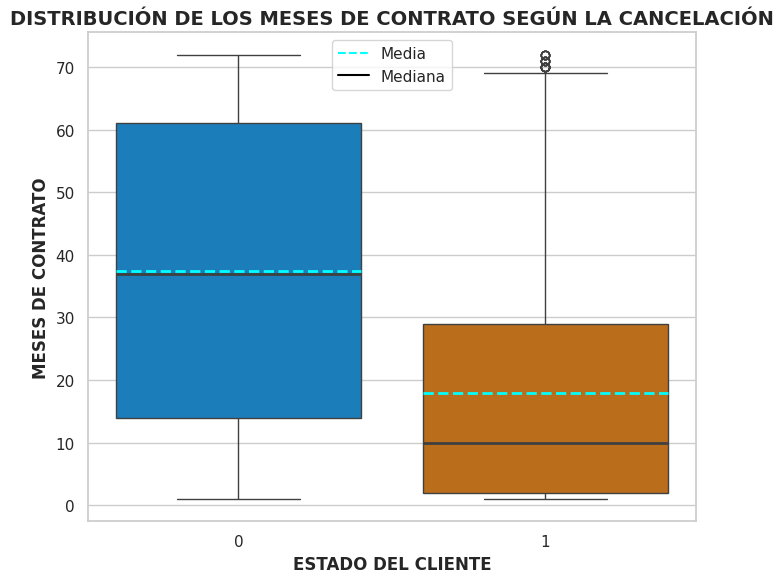

In [165]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=datos_reducido,
    x='Cancelacion',
    y='Meses_contrato',
    hue='Cancelacion',
    palette={0: '#0083d5', 1: '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(datos_reducido.groupby('Cancelacion')):
    ax.hlines(
        y=group['Meses_contrato'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS MESES DE CONTRATO SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("MESES DE CONTRATO", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

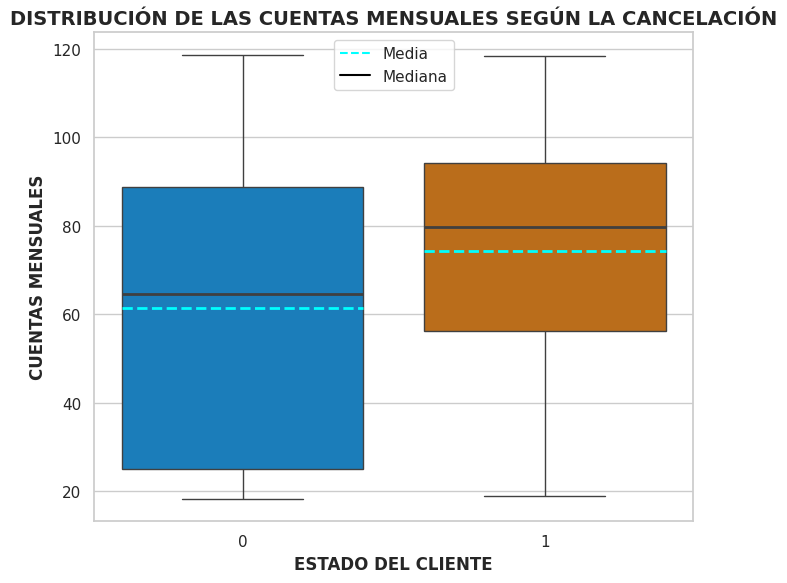

In [166]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=datos_reducido,
    x='Cancelacion',
    y='Cuentas_mensuales',
    hue='Cancelacion',
    palette={0: '#0083d5', 1: '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(datos_reducido.groupby('Cancelacion')):
    ax.hlines(
        y=group['Cuentas_mensuales'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LAS CUENTAS MENSUALES SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("CUENTAS MENSUALES", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

###***Separación de los Datos y análisis***

In [171]:
datos_reducido.columns

Index(['Cancelacion', 'Jubilado', 'Pareja', 'Dependientes', 'Meses_contrato',
       'Multiples_lineas', 'Servicio_internet', 'Seguridad_Ol', 'Backup_Ol',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'Streaming_TV',
       'Streaming_peliculas', 'Tipo_contrato', 'Facturacion_electronica',
       'Metodo_pago', 'Cuentas_mensuales', 'Cuentas_totales',
       'internet_InternetService_activo', 'cantidad_servicios'],
      dtype='object')

In [172]:
datos_reducido

,Cancelacion,Jubilado,Pareja,Dependientes,Meses_contrato,Multiples_lineas,Servicio_internet,Seguridad_Ol,Backup_Ol,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_peliculas,Tipo_contrato,Facturacion_electronica,Metodo_pago,Cuentas_mensuales,Cuentas_totales,internet_InternetService_activo,cantidad_servicios
0,0,0,1,1,9,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,1,5
1,0,0,0,0,9,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1,4
2,1,0,0,0,4,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,1,3
3,1,1,1,0,13,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1,6
4,1,1,1,0,3,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,0,13,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1,4
7252,1,0,1,0,22,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1,4
7253,0,0,0,0,2,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1,3
7254,0,0,1,1,67,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,1,6


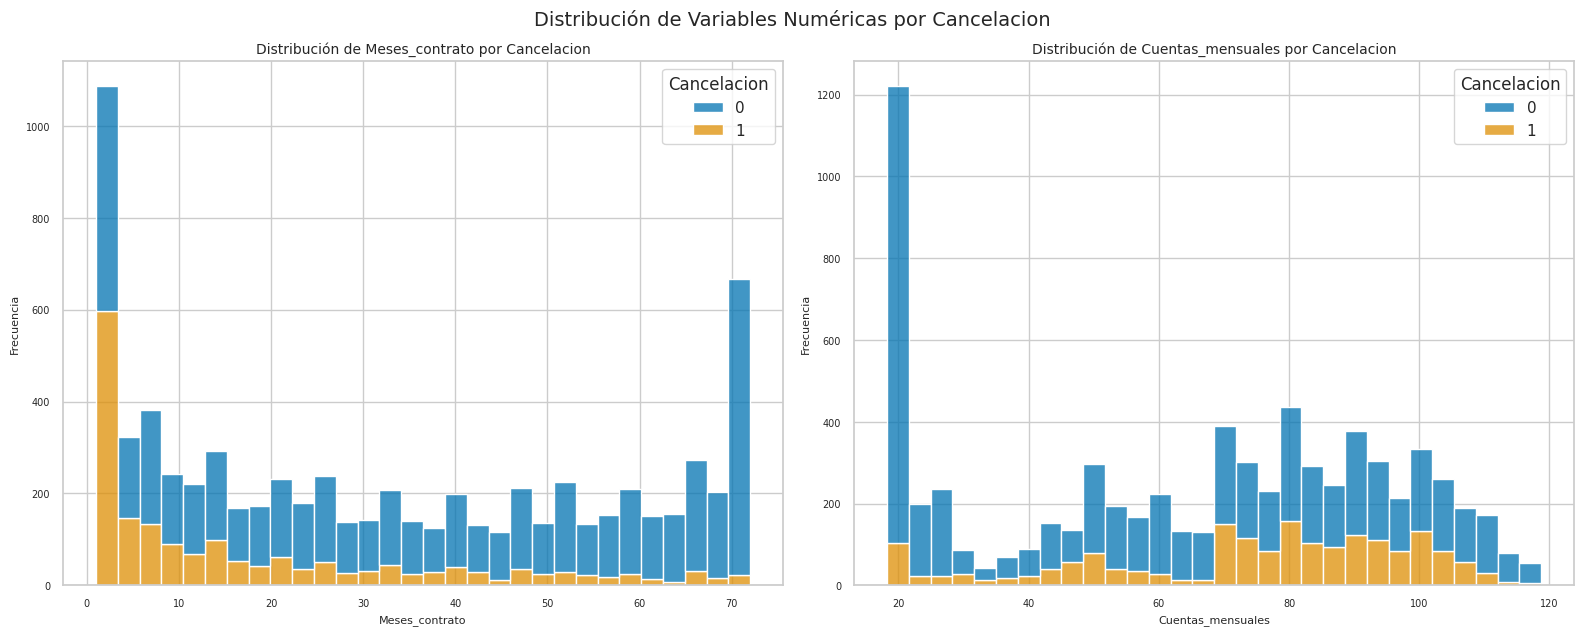


Estadísticas para Meses_contrato:
              count       mean        std  min   25%   50%   75%   max
Cancelacion                                                           
0            5387.0  37.397253  24.144085  1.0  14.0  37.0  61.0  72.0
1            1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

Estadísticas para Cuentas_mensuales:
              count       mean        std    min    25%    50%   75%     max
Cancelacion                                                                 
0            5387.0  61.394932  31.106744  18.25  25.10  64.55  88.7  118.75
1            1869.0  74.441332  24.666053  18.85  56.15  79.65  94.2  118.35


In [197]:
# distribución de las variables numéricas por Abandono(Crunch)
plt.figure(figsize=(16,12))

palette_colorblind = sns.color_palette("colorblind")[:2]

# Histogramas por estado de Abandono
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)

    sns.histplot(
        data=datos_reducido,
        x=columna,
        hue='Cancelacion',
        multiple="stack",
        palette=palette_colorblind,
        bins=30  # Número de bins
    )

    plt.title(f'Distribución de {columna} por Cancelacion', fontsize=10)
    plt.xlabel(columna, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.suptitle('Distribución de Variables Numéricas por Cancelacion', fontsize=14)
plt.tight_layout()
plt.show()

# Análisis estadístico complementario
for columna in columnas_numericas:
    print(f"\nEstadísticas para {columna}:")
    print(datos_reducido.groupby('Cancelacion')[columna].describe())

In [202]:
# Comportamiento de las variables binarias relevantes
variables_binarias = ['Pareja','Dependientes',
                      'Multiples_lineas', 'Seguridad_Ol',
                      'Backup_Ol', 'Proteccion_dispositivo']
for columna in variables_binarias:
    print(columna, datos_reducido[columna].value_counts(normalize=True)*100)

Pareja Pareja
0    51.640022
1    48.359978
Name: proportion, dtype: float64
Dependientes Dependientes
0    70.093716
1    29.906284
Name: proportion, dtype: float64
Multiples_lineas Multiples_lineas
0    57.814223
1    42.185777
Name: proportion, dtype: float64
Seguridad_Ol Seguridad_Ol
0    71.416759
1    28.583241
Name: proportion, dtype: float64
Backup_Ol Backup_Ol
0    65.545755
1    34.454245
Name: proportion, dtype: float64
Proteccion_dispositivo Proteccion_dispositivo
0    65.724917
1    34.275083
Name: proportion, dtype: float64


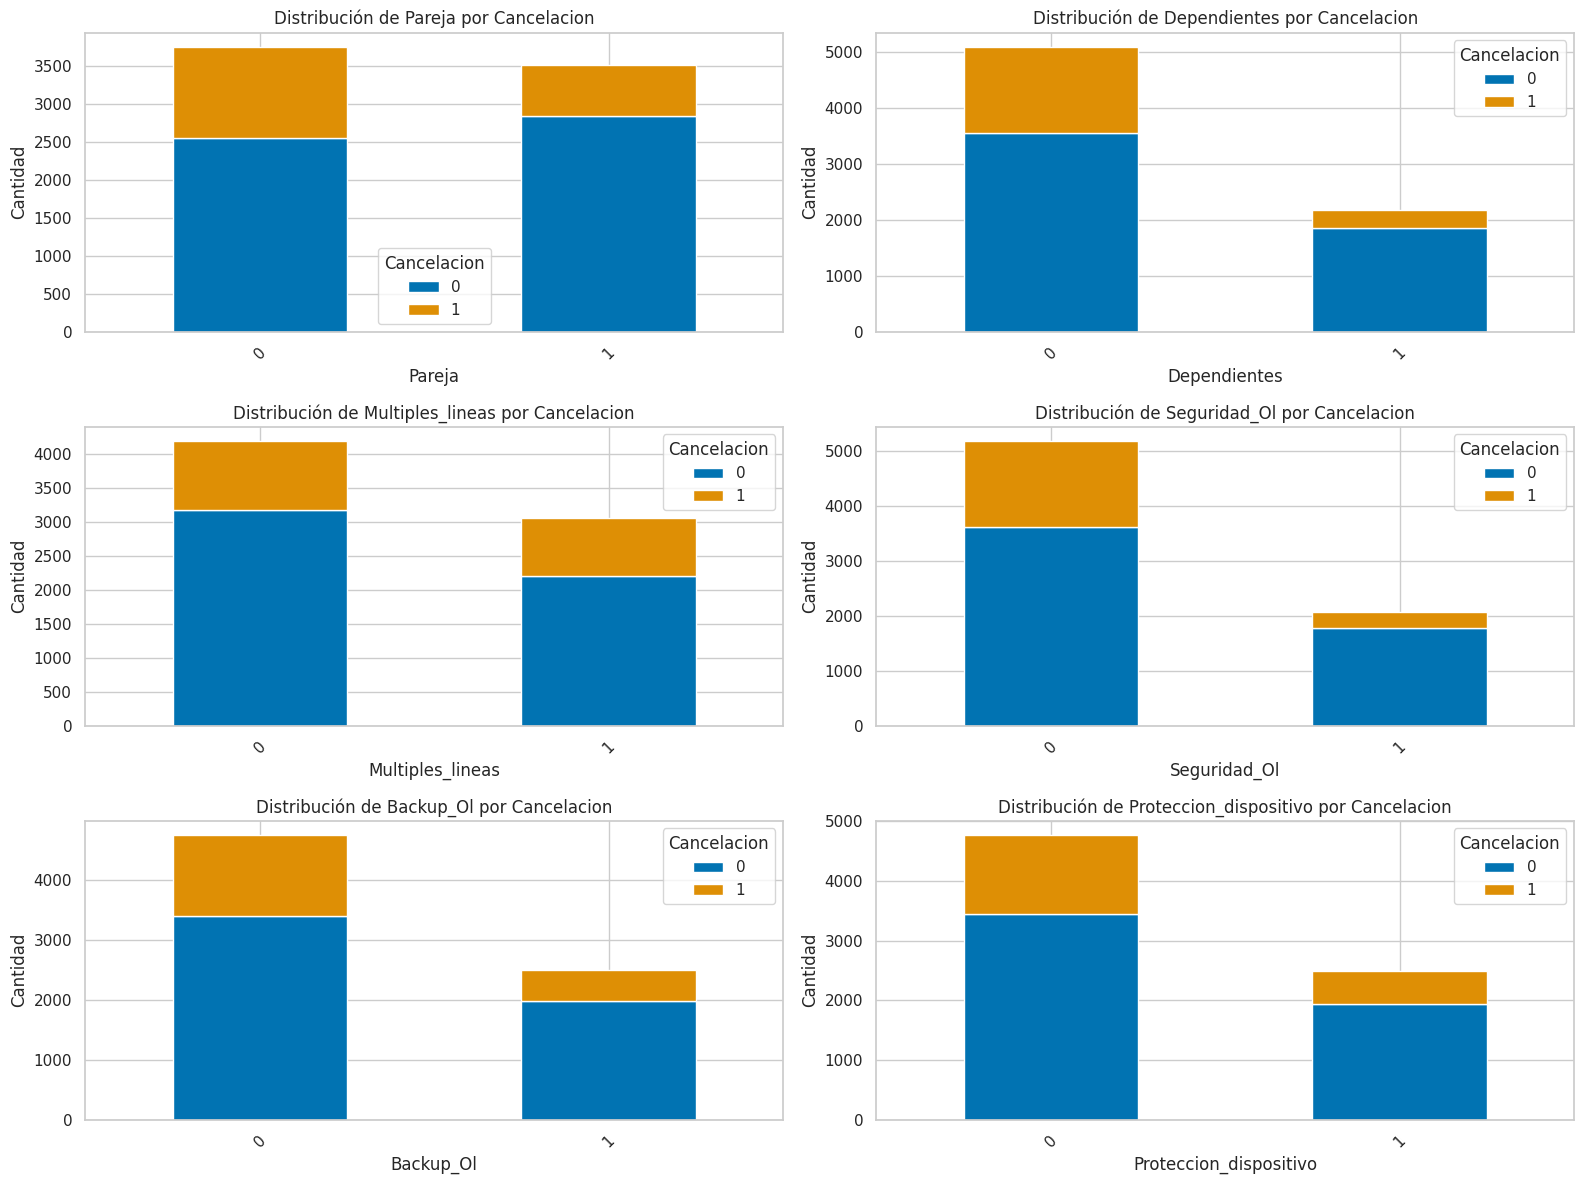

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("colorblind")

plt.figure(figsize=(16,12))
for i, variable in enumerate(variables_binarias, 1):
    plt.subplot(3, 2, i)
    # Gráfico de distribución con abandono
    data_plot = datos_reducido.groupby([variable, 'Cancelacion']).size().unstack(fill_value=0)
    data_plot.plot(kind='bar', stacked=True,
                   color=sns.color_palette("colorblind"),
                   ax=plt.gca())

    plt.title(f'Distribución de {variable} por Cancelacion')
    plt.xlabel(variable)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [206]:
from scipy.stats import chi2_contingency

for columna in variables_binarias:
    contingencia = pd.crosstab(datos_reducido[columna], datos_reducido['Cancelacion'])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{columna}: p-valor = {p_valor}")

Pareja: p-valor = 2.4235147200200372e-36
Dependientes: p-valor = 2.6781225700801645e-42
Multiples_lineas: p-valor = 0.0009050608381887666
Seguridad_Ol: p-valor = 1.1476299683953179e-45
Backup_Ol: p-valor = 1.0154616398923505e-11
Proteccion_dispositivo: p-valor = 7.489500311752718e-08


In [210]:
servicios_internet = [
    'Seguridad_Ol',
    'Backup_Ol',
    'Proteccion_dispositivo',
    'Soporte_tecnico',
    'Streaming_TV',
    'Streaming_peliculas'
]


print("Dependencias con Múltiples Líneas:")
for servicio in servicios_internet:
    contingencia = pd.crosstab(datos_reducido['Multiples_lineas'], datos_reducido[servicio])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{servicio}: p-valor = {p_valor}")


print("\nDependencias entre Servicios de Internet:")
for i in range(len(servicios_internet)):
    for j in range(i+1, len(servicios_internet)):
        servicio1 = servicios_internet[i]
        servicio2 = servicios_internet[j]
        contingencia = pd.crosstab(datos_reducido[servicio1], datos_reducido[servicio2])
        chi2, p_valor, _, _ = chi2_contingency(contingencia)
        print(f"{servicio1} vs {servicio2}: p-valor = {p_valor}")

Dependencias con Múltiples Líneas:
Seguridad_Ol: p-valor = 4.645543330722093e-17
Backup_Ol: p-valor = 3.424060225483578e-68
Proteccion_dispositivo: p-valor = 1.2029531934408628e-66
Soporte_tecnico: p-valor = 9.295270299414026e-17
Streaming_TV: p-valor = 7.635244669278246e-107
Streaming_peliculas: p-valor = 3.3582034765697466e-108

Dependencias entre Servicios de Internet:
Seguridad_Ol vs Backup_Ol: p-valor = 1.0236395492549263e-130
Seguridad_Ol vs Proteccion_dispositivo: p-valor = 3.3257064707405833e-121
Seguridad_Ol vs Soporte_tecnico: p-valor = 3.127726628164159e-201
Seguridad_Ol vs Streaming_TV: p-valor = 5.293838859249224e-51
Seguridad_Ol vs Streaming_peliculas: p-valor = 1.1261891126345073e-58
Backup_Ol vs Proteccion_dispositivo: p-valor = 1.1388806884634883e-149
Backup_Ol vs Soporte_tecnico: p-valor = 3.4865802433927776e-136
Backup_Ol vs Streaming_TV: p-valor = 7.192458677188831e-128
Backup_Ol vs Streaming_peliculas: p-valor = 1.1392416174312204e-122
Proteccion_dispositivo vs Sop

Mapa de calor de correlación entre Servicios de Internet:
                        Seguridad_Ol  Backup_Ol  Proteccion_dispositivo  \
Seguridad_Ol                1.000000   0.285905                0.275152   
Backup_Ol                   0.285905   1.000000                0.306196   
Proteccion_dispositivo      0.275152   0.306196                1.000000   
Soporte_tecnico             0.355656   0.291907                0.331815   
Streaming_TV                0.176661   0.282707                0.393505   
Streaming_peliculas         0.189913   0.276812                0.402915   

                        Soporte_tecnico  Streaming_TV  Streaming_peliculas  
Seguridad_Ol                   0.355656      0.176661             0.189913  
Backup_Ol                      0.291907      0.282707             0.276812  
Proteccion_dispositivo         0.331815      0.393505             0.402915  
Soporte_tecnico                1.000000      0.277870             0.280833  
Streaming_TV                   

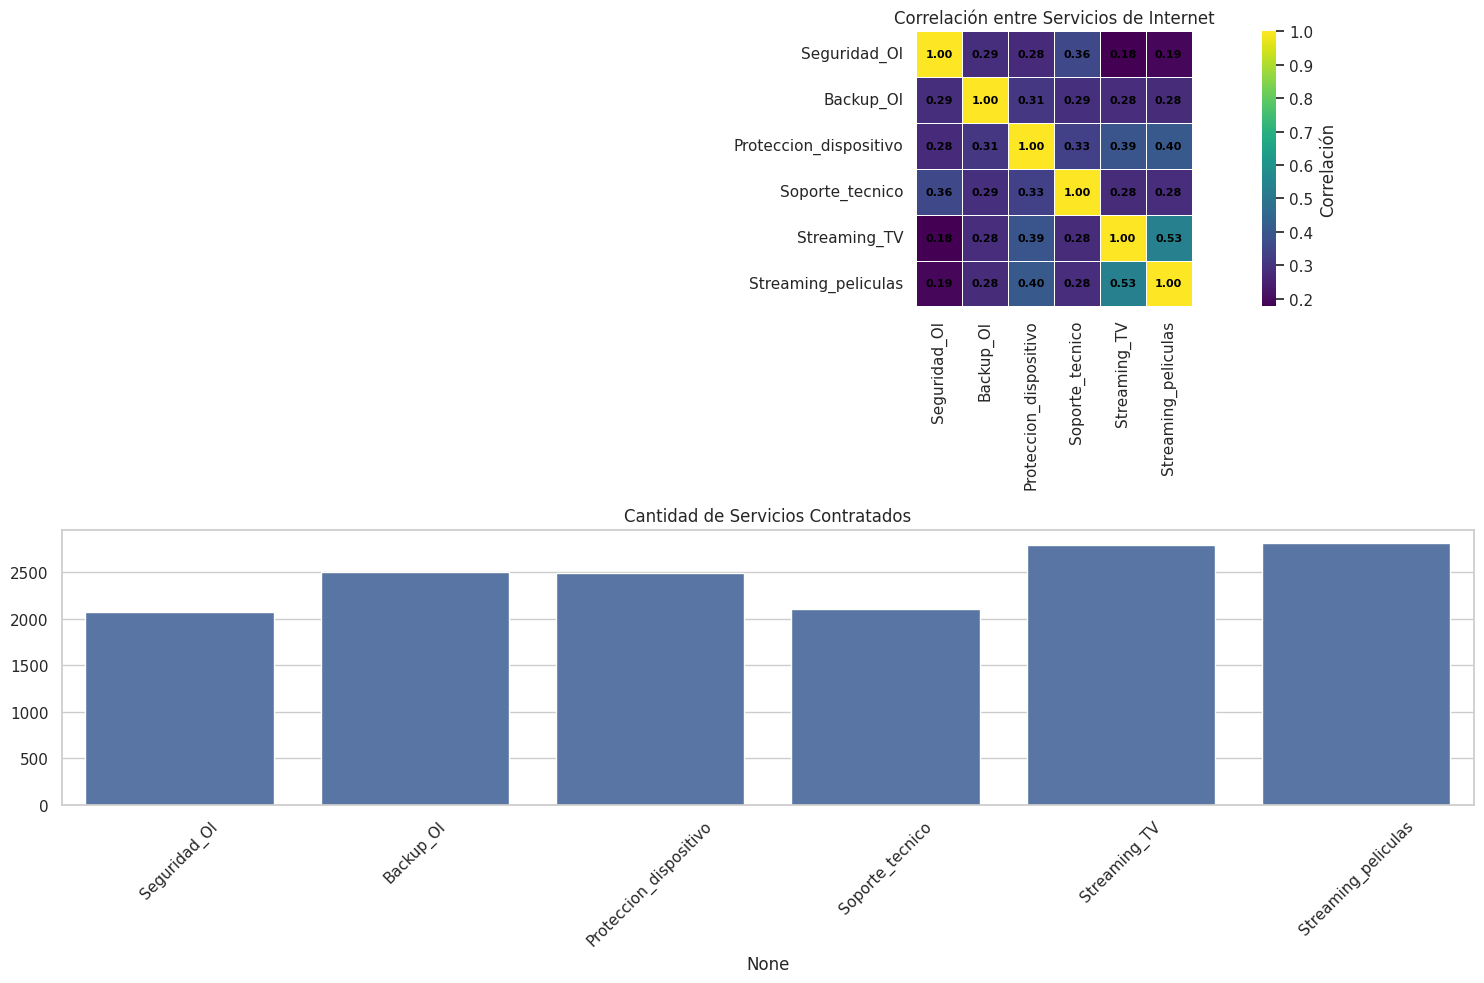

In [211]:
plt.figure(figsize=(15,10))
corr = datos_reducido[servicios_internet].corr()
print("Mapa de calor de correlación entre Servicios de Internet:")
print(corr)

# Heatmap de correlación
plt.subplot(2,1,1)

sns.heatmap(
    datos_reducido[servicios_internet].corr(),
    annot=True,
    cmap='viridis',
    linewidths=0.5,   # Separación entre celdas
    fmt='.2f',        # Formato de números
    square=True,      # Celdas cuadradas
    cbar_kws={'label': 'Correlación'},
    annot_kws={
        'size': 8,    # Tamaño de fuente
        'weight': 'bold',
        'color': 'black'
    }
)
plt.title('Correlación entre Servicios de Internet')

# Distribución de servicios
plt.subplot(2,1,2)
servicios_count = datos_reducido[servicios_internet].sum()
sns.barplot(x=servicios_count.index, y=servicios_count.values)
plt.title('Cantidad de Servicios Contratados')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [213]:
def analisis_abandono_servicios(servicios):
    resultados = {}
    for servicio in servicios:
        Cancelacion_con_servicio = datos_reducido[datos_reducido[servicio] == 1]['Cancelacion'].mean()
        Cancelacion_sin_servicio = datos_reducido[datos_reducido[servicio] == 0]['Cancelacion'].mean()

        resultados[servicio] = {
            'Cancelacion con servicio': Cancelacion_con_servicio,
            'Cancelacion sin servicio': Cancelacion_sin_servicio,
            'Diferencia': Cancelacion_con_servicio - Cancelacion_sin_servicio
        }

    return pd.DataFrame.from_dict(resultados, orient='index')

# Análisis de abandono
print("Análisis de Cancelacion por Servicios:")
print(analisis_abandono_servicios(servicios_internet))

Análisis de Cancelacion por Servicios:
                        Cancelacion con servicio  Cancelacion sin servicio  \
Seguridad_Ol                            0.142237                  0.303744   
Backup_Ol                               0.209200                  0.283011   
Proteccion_dispositivo                  0.219140                  0.277626   
Soporte_tecnico                         0.147619                  0.302366   
Streaming_TV                            0.292175                  0.236018   
Streaming_peliculas                     0.290586                  0.236658   

                        Diferencia  
Seguridad_Ol             -0.161507  
Backup_Ol                -0.073811  
Proteccion_dispositivo   -0.058487  
Soporte_tecnico          -0.154747  
Streaming_TV              0.056157  
Streaming_peliculas       0.053928  


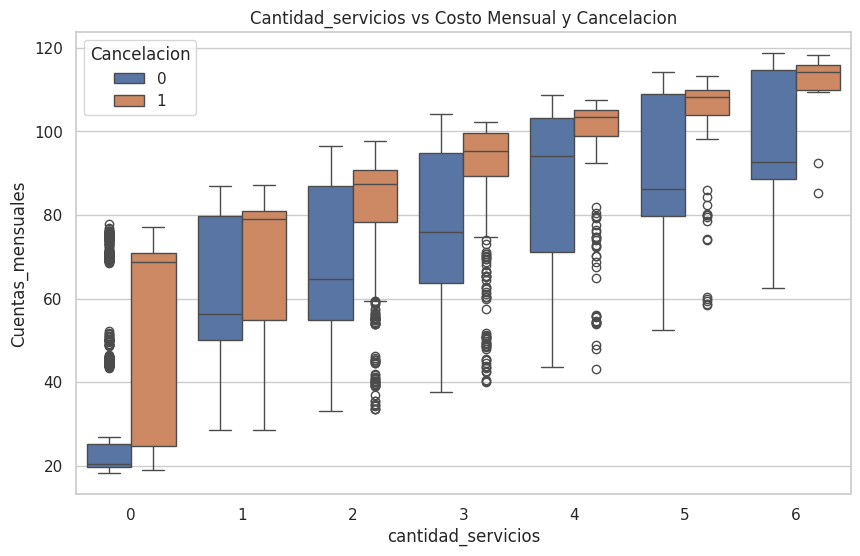

In [217]:
datos_reducido['cantidad_servicios'] = datos_reducido[servicios_internet].sum(axis=1)

plt.figure(figsize=(10,6))
sns.boxplot(x='cantidad_servicios', y='Cuentas_mensuales', hue='Cancelacion', data=datos_reducido)
plt.title('Cantidad_servicios vs Costo Mensual y Cancelacion')
plt.show()

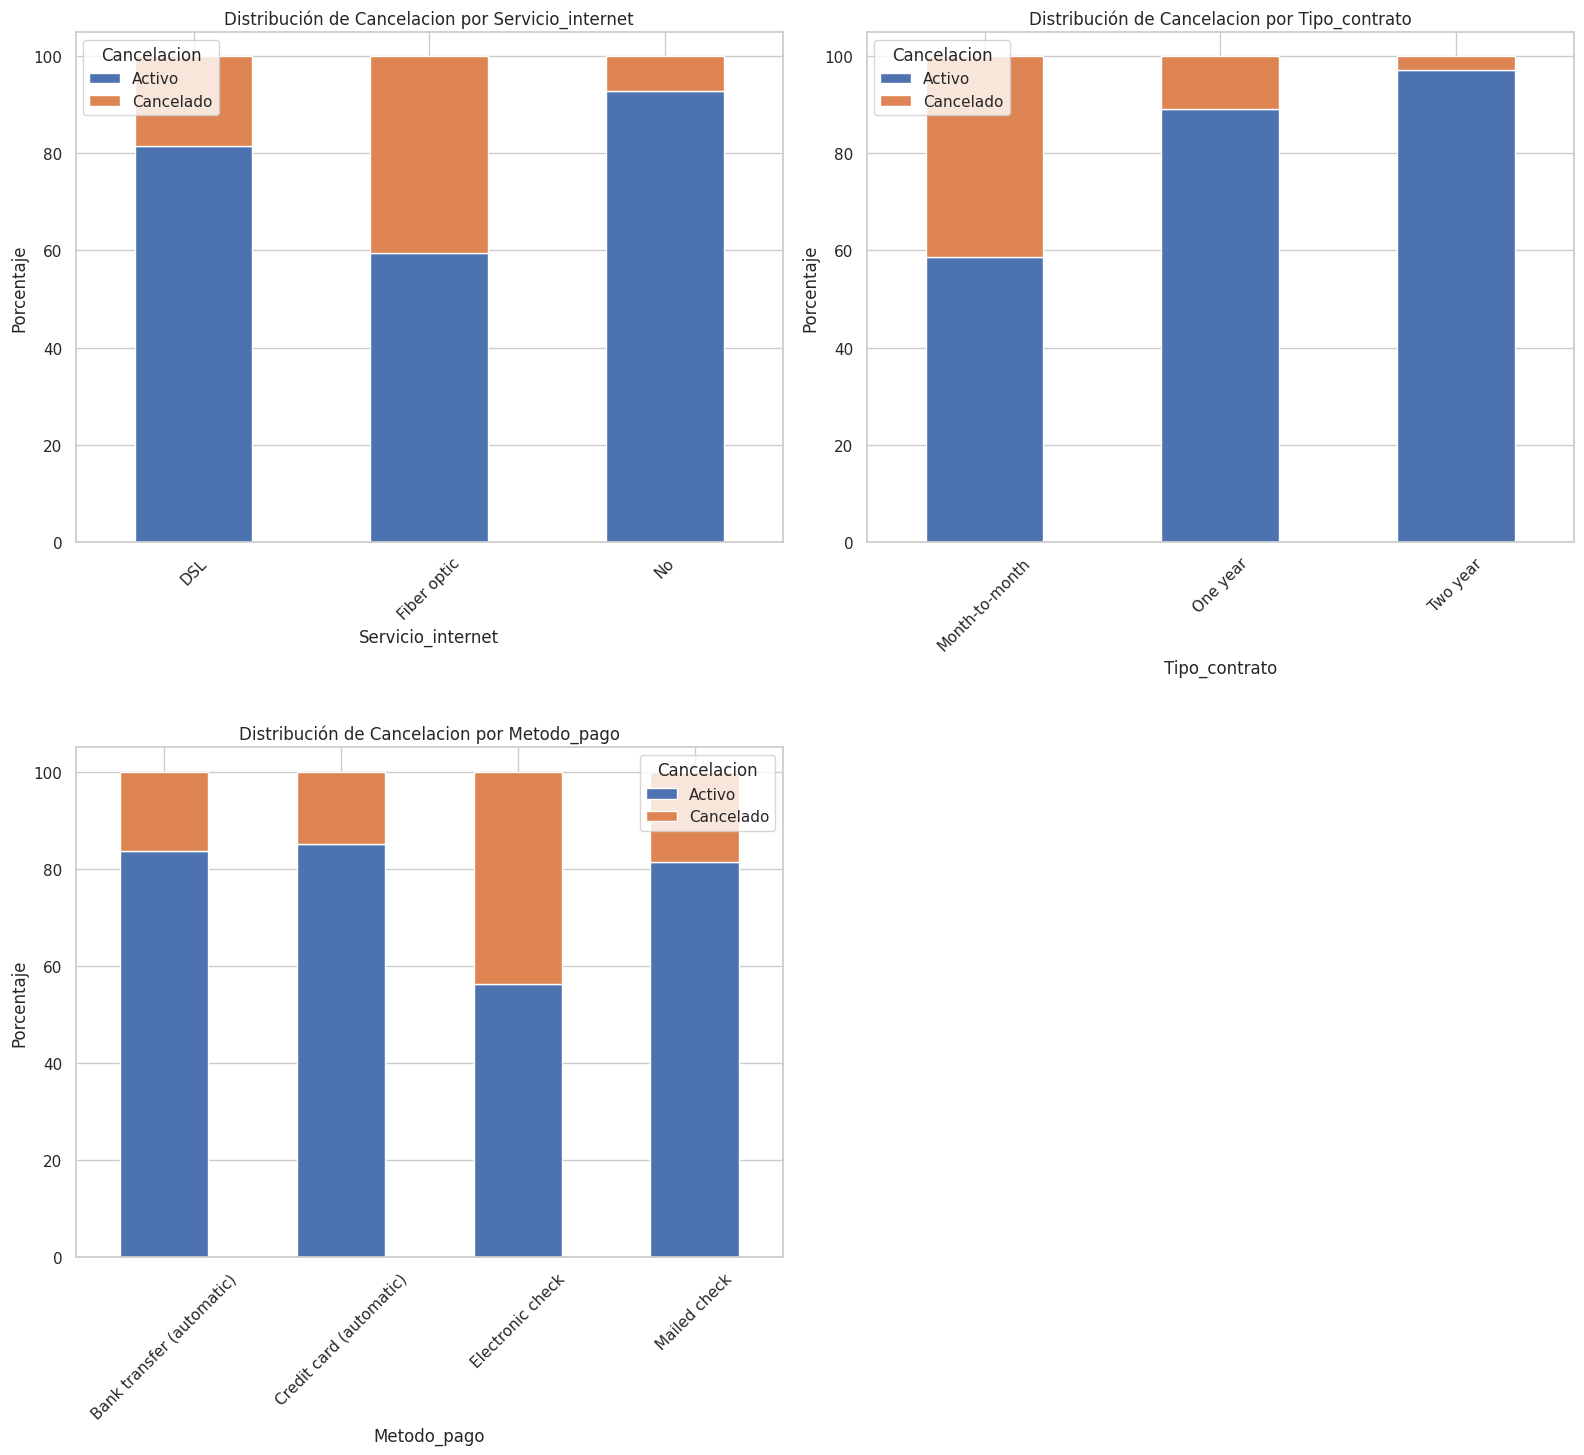

In [221]:
categoricas = [ 'Servicio_internet', 'Tipo_contrato', 'Metodo_pago']
plt.figure(figsize=(16,20))

for i, variable in enumerate(categoricas, 1):
    plt.subplot(3, 2, i)

    # Gráfico de distribución con abandono
    data_plot = datos_reducido.groupby([variable, 'Cancelacion']).size().unstack(fill_value=0)
    data_plot_percent = data_plot.div(data_plot.sum(axis=1), axis=0) * 100

    data_plot_percent.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribución de Cancelacion por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Porcentaje')
    plt.legend(title='Cancelacion', labels=['Activo', 'Cancelado'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [222]:
from scipy.stats import chi2_contingency

for variable in categoricas:
    contingencia = pd.crosstab(datos_reducido[variable], datos_reducido['Cancelacion'])
    chi2, p_value, dof, expected = chi2_contingency(contingencia)

    print(f"\nVariable: {variable}")
    print(f"Chi-cuadrado: {chi2}")
    print(f"P-value: {p_value}")
    print("Significativa:" + " Sí" if p_value < 0.05 else " No")


Variable: Servicio_internet
Chi-cuadrado: 719.3277665186621
P-value: 6.308994671076636e-157
Significativa: Sí

Variable: Tipo_contrato
Chi-cuadrado: 1160.7168376541629
P-value: 8.985477836592066e-253
Significativa: Sí

Variable: Metodo_pago
Chi-cuadrado: 634.1113461102893
P-value: 4.0567368171773413e-137
Significativa: Sí


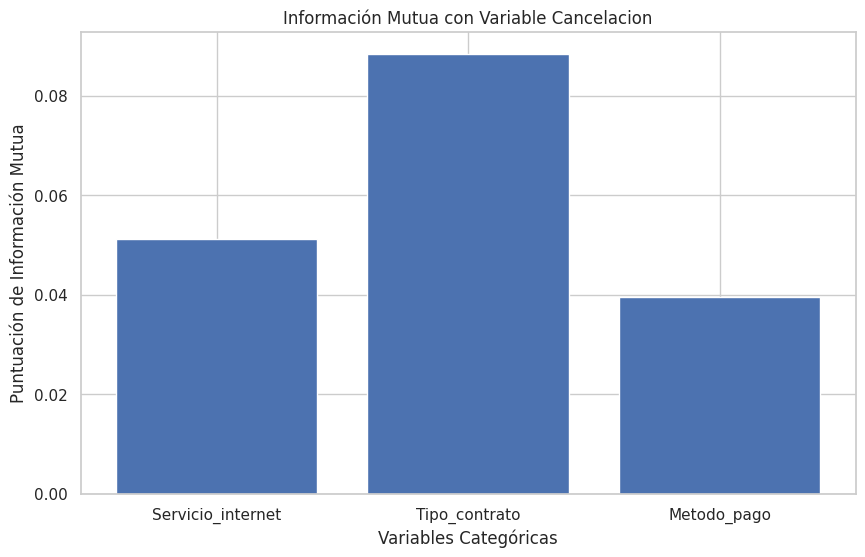

Servicio_internet: 0.05112186265495833
Tipo_contrato: 0.08846925391569171
Metodo_pago: 0.039455641313334455


In [223]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = datos_reducido[categoricas].apply(le.fit_transform)

# Calcular información mutua
mi_scores = mutual_info_classif(X_encoded, datos_reducido['Cancelacion'])

# Visualizar
plt.figure(figsize=(10,6))
plt.bar(categoricas, mi_scores)
plt.title('Información Mutua con Variable Cancelacion')
plt.xlabel('Variables Categóricas')
plt.ylabel('Puntuación de Información Mutua')
plt.show()

# Imprimir scores
for var, score in zip(categoricas, mi_scores):
    print(f"{var}: {score}")

In [234]:

X = datos_reducido.drop('Cancelacion', axis = 1)
y = datos_reducido['Cancelacion']

In [235]:
X

,Jubilado,Pareja,Dependientes,Meses_contrato,Multiples_lineas,Servicio_internet,Seguridad_Ol,Backup_Ol,Proteccion_dispositivo,Soporte_tecnico,Streaming_TV,Streaming_peliculas,Tipo_contrato,Facturacion_electronica,Metodo_pago,Cuentas_mensuales,Cuentas_totales,internet_InternetService_activo,cantidad_servicios
0,0,1,1,9,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,1,3
1,0,0,0,9,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1,1
2,0,0,0,4,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,1,1
3,1,1,0,13,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1,4
4,1,1,0,3,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,13,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1,2
7252,0,1,0,22,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1,1
7253,0,0,0,2,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1,1
7254,0,1,1,67,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,1,4


In [236]:
y

,Cancelacion
0,0
1,0
2,1
3,1
4,1
...,...
7251,0
7252,1
7253,0
7254,0


###***Codificación***

In [266]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [267]:
columnas_categoricas = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_numericas = ['Meses_contrato', 'Cuentas_mensuales']

In [268]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [269]:
one_hot = make_column_transformer((OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                                   columnas_categoricas), (StandardScaler(), columnas_numericas),
                                   remainder='passthrough', sparse_threshold=0)

In [270]:
X_train_encoded = one_hot.fit_transform(X_train)
X_test_encoded = one_hot.transform(X_test)

In [271]:
one_hot.get_feature_names_out()

array(['onehotencoder__Servicio_internet_DSL',
       'onehotencoder__Servicio_internet_Fiber optic',
       'onehotencoder__Servicio_internet_No',
       'onehotencoder__Tipo_contrato_Month-to-month',
       'onehotencoder__Tipo_contrato_One year',
       'onehotencoder__Tipo_contrato_Two year',
       'onehotencoder__Metodo_pago_Bank transfer (automatic)',
       'onehotencoder__Metodo_pago_Credit card (automatic)',
       'onehotencoder__Metodo_pago_Electronic check',
       'onehotencoder__Metodo_pago_Mailed check',
       'standardscaler__Meses_contrato',
       'standardscaler__Cuentas_mensuales', 'remainder__Jubilado',
       'remainder__Pareja', 'remainder__Dependientes',
       'remainder__Multiples_lineas', 'remainder__Seguridad_Ol',
       'remainder__Backup_Ol', 'remainder__Proteccion_dispositivo',
       'remainder__Soporte_tecnico', 'remainder__Streaming_TV',
       'remainder__Streaming_peliculas',
       'remainder__Facturacion_electronica', 'remainder__Cuentas_totales'

In [273]:
X_train_df = pd.DataFrame(X_train_encoded, columns = one_hot.get_feature_names_out())
X_train_df

,onehotencoder__Servicio_internet_DSL,onehotencoder__Servicio_internet_Fiber optic,onehotencoder__Servicio_internet_No,onehotencoder__Tipo_contrato_Month-to-month,onehotencoder__Tipo_contrato_One year,onehotencoder__Tipo_contrato_Two year,onehotencoder__Metodo_pago_Bank transfer (automatic),onehotencoder__Metodo_pago_Credit card (automatic),onehotencoder__Metodo_pago_Electronic check,onehotencoder__Metodo_pago_Mailed check,...,remainder__Seguridad_Ol,remainder__Backup_Ol,remainder__Proteccion_dispositivo,remainder__Soporte_tecnico,remainder__Streaming_TV,remainder__Streaming_peliculas,remainder__Facturacion_electronica,remainder__Cuentas_totales,remainder__internet_InternetService_activo,remainder__cantidad_servicios
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2748.70,1.0,3.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1460.65,1.0,2.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.90,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,794.25,1.0,2.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4968.00,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,71.25,1.0,0.0
5800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,890.60,1.0,4.0
5801,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,229.40,1.0,3.0
5802,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2737.05,1.0,3.0


In [274]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Servicio_internet_DSL                  5804 non-null   float64
 1   onehotencoder__Servicio_internet_Fiber optic          5804 non-null   float64
 2   onehotencoder__Servicio_internet_No                   5804 non-null   float64
 3   onehotencoder__Tipo_contrato_Month-to-month           5804 non-null   float64
 4   onehotencoder__Tipo_contrato_One year                 5804 non-null   float64
 5   onehotencoder__Tipo_contrato_Two year                 5804 non-null   float64
 6   onehotencoder__Metodo_pago_Bank transfer (automatic)  5804 non-null   float64
 7   onehotencoder__Metodo_pago_Credit card (automatic)    5804 non-null   float64
 8   onehotencoder__Metodo_pago_Electronic check           5804

In [275]:
X_test_df = pd.DataFrame(X_test_encoded, columns=one_hot.get_feature_names_out())
X_test_df

,onehotencoder__Servicio_internet_DSL,onehotencoder__Servicio_internet_Fiber optic,onehotencoder__Servicio_internet_No,onehotencoder__Tipo_contrato_Month-to-month,onehotencoder__Tipo_contrato_One year,onehotencoder__Tipo_contrato_Two year,onehotencoder__Metodo_pago_Bank transfer (automatic),onehotencoder__Metodo_pago_Credit card (automatic),onehotencoder__Metodo_pago_Electronic check,onehotencoder__Metodo_pago_Mailed check,...,remainder__Seguridad_Ol,remainder__Backup_Ol,remainder__Proteccion_dispositivo,remainder__Soporte_tecnico,remainder__Streaming_TV,remainder__Streaming_peliculas,remainder__Facturacion_electronica,remainder__Cuentas_totales,remainder__internet_InternetService_activo,remainder__cantidad_servicios
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,911.60,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1930.90,1.0,4.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1752.65,1.0,3.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,660.05,1.0,3.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1098.85,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1592.35,1.0,1.0
1448,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,865.10,1.0,3.0
1449,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,8127.60,1.0,6.0
1450,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1393.60,1.0,2.0


In [276]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   onehotencoder__Servicio_internet_DSL                  1452 non-null   float64
 1   onehotencoder__Servicio_internet_Fiber optic          1452 non-null   float64
 2   onehotencoder__Servicio_internet_No                   1452 non-null   float64
 3   onehotencoder__Tipo_contrato_Month-to-month           1452 non-null   float64
 4   onehotencoder__Tipo_contrato_One year                 1452 non-null   float64
 5   onehotencoder__Tipo_contrato_Two year                 1452 non-null   float64
 6   onehotencoder__Metodo_pago_Bank transfer (automatic)  1452 non-null   float64
 7   onehotencoder__Metodo_pago_Credit card (automatic)    1452 non-null   float64
 8   onehotencoder__Metodo_pago_Electronic check           1452

In [277]:
X_train_corr = X_train_df.copy()
X_train_corr['Cancelacion'] = y_train.reset_index(drop=True)

correlaciones = X_train_corr.corr()['Cancelacion'].sort_values(ascending=False)
print(correlaciones)

Cancelacion                                             1.000000
onehotencoder__Tipo_contrato_Month-to-month             0.392335
onehotencoder__Servicio_internet_Fiber optic            0.305468
onehotencoder__Metodo_pago_Electronic check             0.297865
remainder__internet_InternetService_activo              0.222290
standardscaler__Cuentas_mensuales                       0.196073
remainder__Facturacion_electronica                      0.193054
remainder__Jubilado                                     0.152502
remainder__Streaming_TV                                 0.072820
remainder__Streaming_peliculas                          0.062243
remainder__Multiples_lineas                             0.040443
remainder__Proteccion_dispositivo                      -0.052780
remainder__cantidad_servicios                          -0.077816
remainder__Backup_Ol                                   -0.080757
onehotencoder__Metodo_pago_Mailed check                -0.090447
onehotencoder__Metodo_pag

In [278]:
print("X_train_df shape:", X_train_df.shape)
print("y_train shape:", y_train.shape)

X_train_df shape: (5804, 26)
y_train shape: (5804,)


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector = RFECV(estimator=modelo_l1, step=1, cv=5, scoring='accuracy')
selector.fit(X_train_df, y_train)

selected_features = X_train_df.columns[selector.support_]
print("Número óptimo de variables:", selector.n_features_)

Número óptimo de variables: 24


In [280]:
from sklearn.feature_selection import RFE

modelo_base = LogisticRegression(penalty='l1', solver='liblinear', C = 10, random_state=42)
selector = RFE(estimator=modelo_base, n_features_to_select=29)

selector.fit(X_train_df, y_train)
selected_features_mask = selector.support_
selected_features = X_train_df.columns[selected_features_mask]

X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

print("Las variables seleccionadas son:")
print(selected_features)

Las variables seleccionadas son:
Index(['onehotencoder__Servicio_internet_DSL',
       'onehotencoder__Servicio_internet_Fiber optic',
       'onehotencoder__Servicio_internet_No',
       'onehotencoder__Tipo_contrato_Month-to-month',
       'onehotencoder__Tipo_contrato_One year',
       'onehotencoder__Tipo_contrato_Two year',
       'onehotencoder__Metodo_pago_Bank transfer (automatic)',
       'onehotencoder__Metodo_pago_Credit card (automatic)',
       'onehotencoder__Metodo_pago_Electronic check',
       'onehotencoder__Metodo_pago_Mailed check',
       'standardscaler__Meses_contrato', 'standardscaler__Cuentas_mensuales',
       'remainder__Jubilado', 'remainder__Pareja', 'remainder__Dependientes',
       'remainder__Multiples_lineas', 'remainder__Seguridad_Ol',
       'remainder__Backup_Ol', 'remainder__Proteccion_dispositivo',
       'remainder__Soporte_tecnico', 'remainder__Streaming_TV',
       'remainder__Streaming_peliculas', 'remainder__Facturacion_electronica',
       'r

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning:

Found n_features_to_select=29 > n_features=26. There will be no feature selection and all features will be kept.



##***Balanceo de Clases***

In [281]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_selected, y_train)

print("Distribución original:", Counter(y))
print("Distribución del entrenamiento antes del balanceo:", Counter(y_train))
print("Distribución del entrenamiento balanceado:", Counter(y_train_bal))

counter = Counter(y_train_bal)
if len(set(counter.values())) == 1:
    print("Las clases están perfectamente balanceadas.")
else:
    print("Las clases NO están balanceadas perfectamente.")

Distribución original: Counter({0: 5387, 1: 1869})
Distribución del entrenamiento antes del balanceo: Counter({0: 4309, 1: 1495})
Distribución del entrenamiento balanceado: Counter({0: 4309, 1: 4309})
Las clases están perfectamente balanceadas.


In [259]:
distribucion = datos_reducido['Cancelacion'].value_counts(normalize=True)
print(distribucion)

# Calcular ratio de desbalanceo
ratio = len(datos_reducido[datos_reducido['Cancelacion']==0]) / len(datos_reducido[datos_reducido['Cancelacion']==1])
print(f"Ratio de desbalanceo: {ratio}")

Cancelacion
0    0.74242
1    0.25758
Name: proportion, dtype: float64
Ratio de desbalanceo: 2.882289994649545


## ***Creación y Evaluación de los Modelos***

In [282]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluar_modelo(y_test, y_pred):
  print("Resultados para el modelo:")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred):.2f}")
  print(f"F1: {f1_score(y_test, y_pred):.2f}")

In [283]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(
    penalty='l2',
    C=10,
    class_weight= 'balanced',
    solver='liblinear',
    max_iter=5000,
    random_state=42
)

modelo.fit(X_train_bal, y_train_bal)
y_modelo_lr = modelo.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_lr)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.49
Recall: 0.80
F1: 0.61


In [284]:
from sklearn.ensemble import RandomForestClassifier

modelo2 = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

modelo2.fit(X_train_bal, y_train_bal)
y_modelo_rf = modelo2.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_rf)

Resultados para el modelo:
Accuracy: 0.75
Precision: 0.51
Recall: 0.77
F1: 0.61


In [285]:
from sklearn.ensemble import GradientBoostingClassifier

modelo3 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo3.fit(X_train_bal, y_train_bal)
y_modelo_gb = modelo3.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_gb)

Resultados para el modelo:
Accuracy: 0.75
Precision: 0.50
Recall: 0.77
F1: 0.61


In [286]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

modelo_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

modelo_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo_voto = VotingClassifier(estimators=[('rf', modelo_rf), ('gb', modelo_gb)],voting='soft')
modelo_voto.fit(X_train_bal, y_train_bal)
y_proba = modelo_voto.predict_proba(X_test_selected)[:, 1]
umbral = 0.45
y_pred = (y_proba >= umbral).astype(int)
evaluar_modelo(y_test, y_pred)

Resultados para el modelo:
Accuracy: 0.73
Precision: 0.49
Recall: 0.80
F1: 0.61


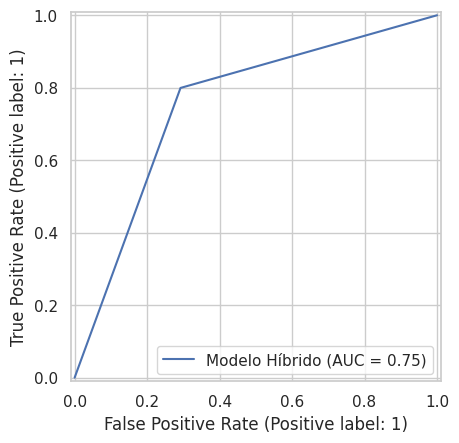

In [287]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred, name = 'Modelo Híbrido');

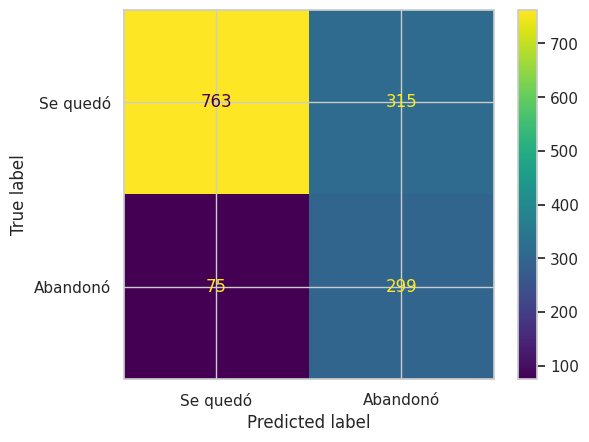

In [288]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusion = confusion_matrix(y_test, y_pred)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['Se quedó', 'Abandonó'])
visualizacion_matriz.plot();

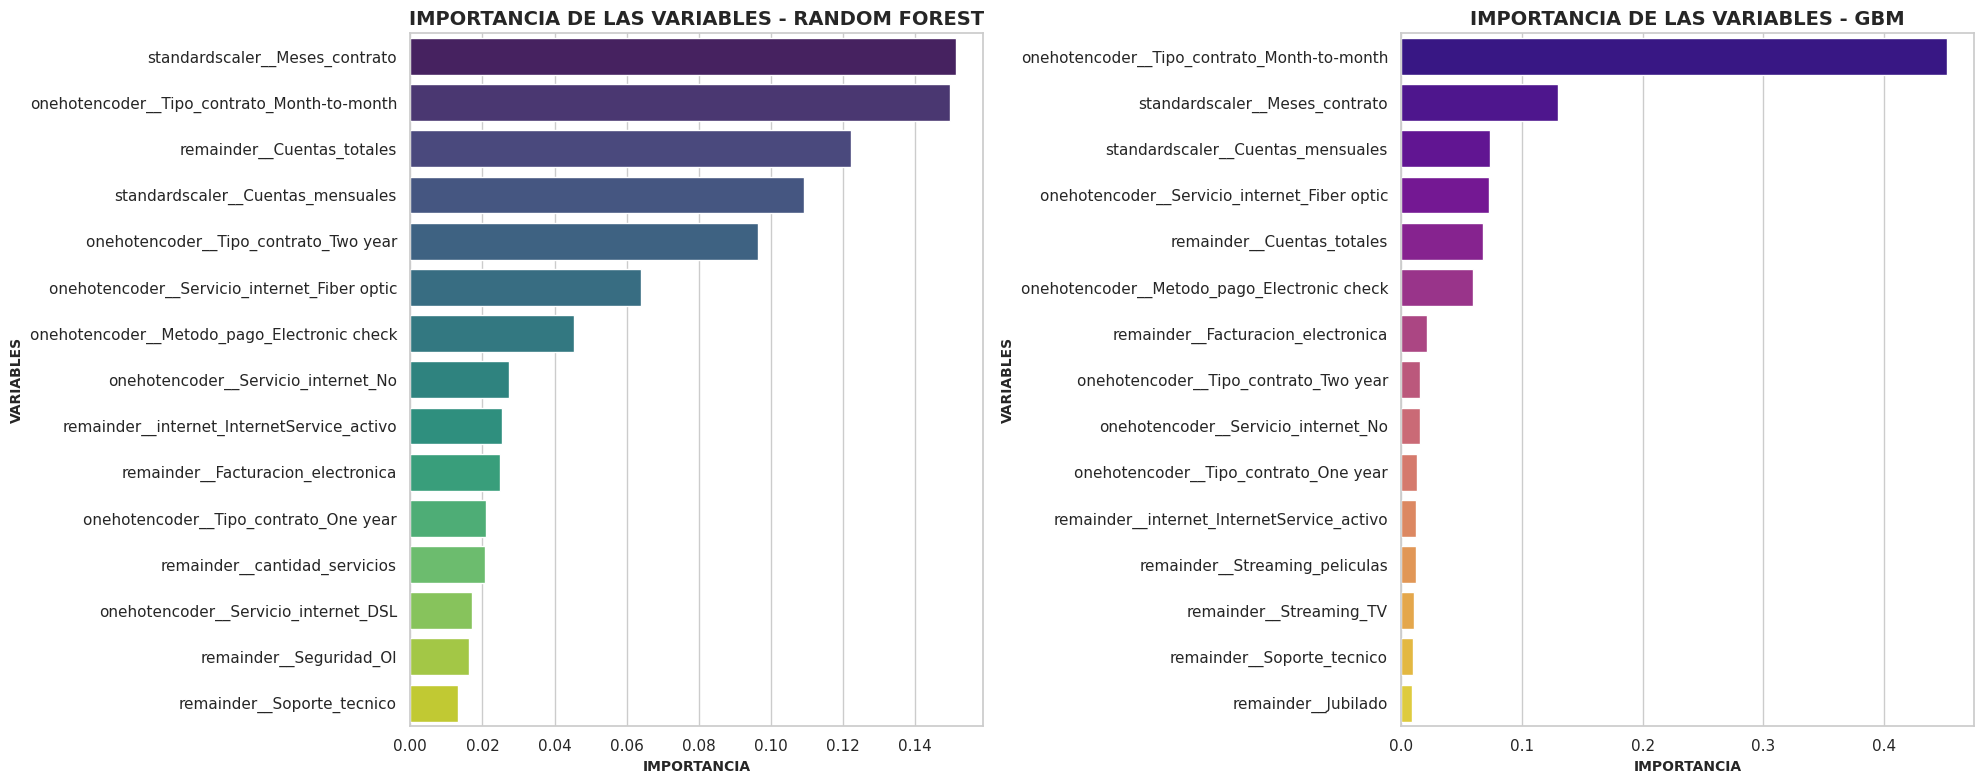

In [289]:
rf_importance = modelo2.feature_importances_
gb_importance = modelo3.feature_importances_

feature_names = X_train_selected.columns
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'RandomForest': rf_importance,
    'GBM': gb_importance
})

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
rf_plot_data = importance_df.sort_values('RandomForest', ascending=False).head(15)
sns.barplot(x='RandomForest', y='Variable', data=rf_plot_data, ax=axes[0], palette='viridis', hue='Variable', legend=False)
axes[0].set_title('IMPORTANCIA DE LAS VARIABLES - RANDOM FOREST', fontsize=14, fontweight='bold')
axes[0].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[0].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

gbm_plot_data = importance_df.sort_values('GBM', ascending=False).head(15)
sns.barplot(x='GBM', y='Variable', data=gbm_plot_data, ax=axes[1], palette='plasma', hue='Variable', legend=False)
axes[1].set_title('IMPORTANCIA DE LAS VARIABLES - GBM', fontsize=14, fontweight='bold')
axes[1].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[1].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [290]:
comparison_table = importance_df.sort_values(by='RandomForest', ascending=False).reset_index(drop=True).head(15)
print("TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES")
print("-" * 50)
print(comparison_table)

TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES
--------------------------------------------------
                                        Variable  RandomForest       GBM
0                 standardscaler__Meses_contrato      0.151214  0.129811
1    onehotencoder__Tipo_contrato_Month-to-month      0.149688  0.451856
2                     remainder__Cuentas_totales      0.122215  0.067619
3              standardscaler__Cuentas_mensuales      0.109161  0.073210
4          onehotencoder__Tipo_contrato_Two year      0.096266  0.015935
5   onehotencoder__Servicio_internet_Fiber optic      0.063934  0.072335
6    onehotencoder__Metodo_pago_Electronic check      0.045439  0.059246
7            onehotencoder__Servicio_internet_No      0.027264  0.015241
8     remainder__internet_InternetService_activo      0.025457  0.011957
9             remainder__Facturacion_electronica      0.024770  0.021600
10         onehotencoder__Tipo_contrato_One year      0.021037  0.012821
11                 r

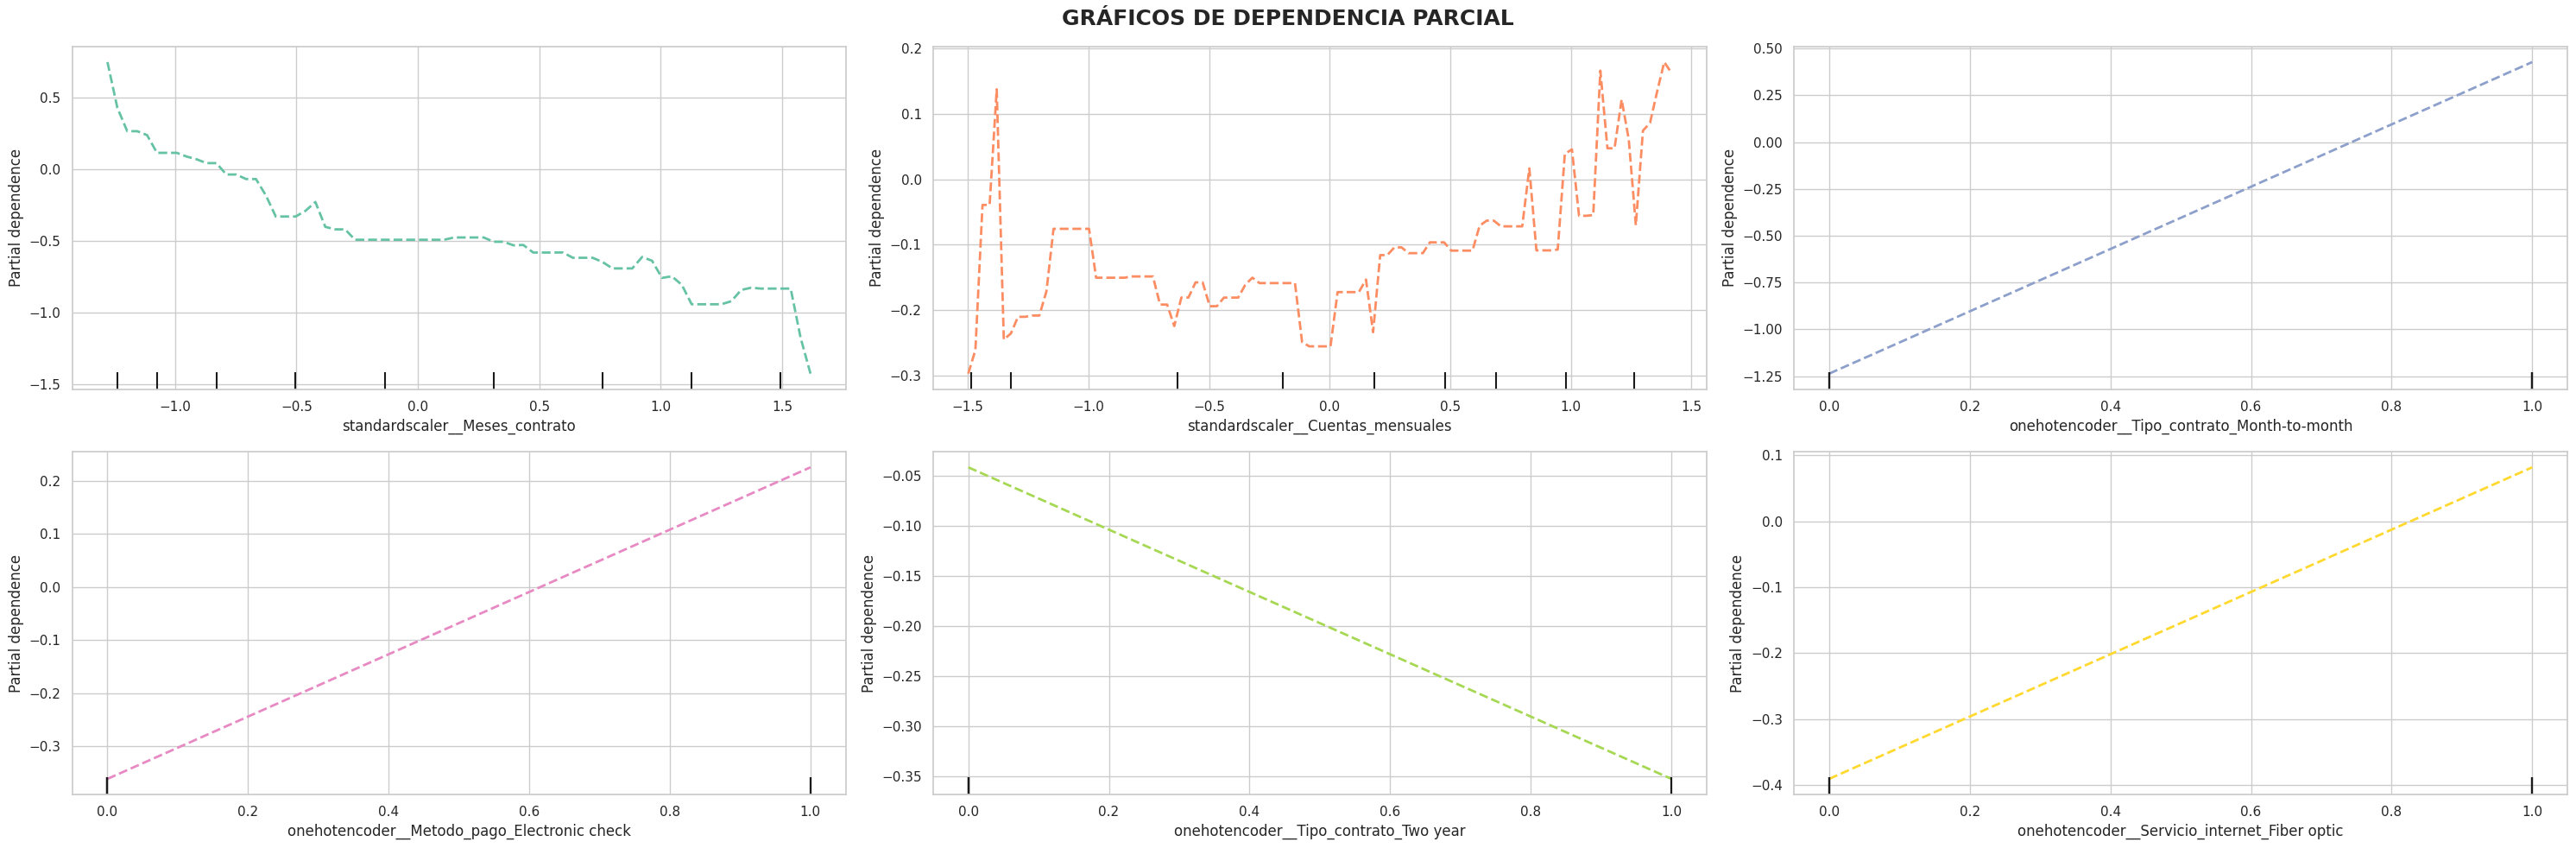

In [292]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [
    'standardscaler__Meses_contrato',
    'standardscaler__Cuentas_mensuales',
    'onehotencoder__Tipo_contrato_Month-to-month',
    'onehotencoder__Metodo_pago_Electronic check',
    'onehotencoder__Tipo_contrato_Two year',
    'onehotencoder__Servicio_internet_Fiber optic'
]

fig, axs = plt.subplots(2, 3, figsize=(30, 10))
palette = sns.color_palette("Set2", len(features_to_plot))
line_kw_list = [{"color": c, "linewidth": 2, "linestyle": "--"} for c in palette]
fig.suptitle('GRÁFICOS DE DEPENDENCIA PARCIAL', fontsize=18, fontweight='bold')

for i, feature in enumerate(features_to_plot):
    ax = axs.ravel()[i]

    PartialDependenceDisplay.from_estimator(
        modelo3,
        X_train_selected,
        [feature],
        ax=ax,
        kind='average',
        grid_resolution=100,
        line_kw=line_kw_list[i]
    )

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#***Conclusiones***
El objetivo principal de este desafío fue desarrollar un modelo predictivo capaz de identificar a los clientes con mayor probabilidad de cancelar sus servicios (churn) en la empresa Telecom X, con el fin de implementar estrategias de retención más efectivas y proactivas.

El proyecto se llevó a cabo utilizando un DataFrame previamente procesado, que incluyó tareas de preparación como la codificación de variables, balanceo de clases, y la separación de los datos en conjuntos de entrenamiento y prueba. A partir de este conjunto, se construyeron y evaluaron distintos modelos de predicción.

Dado que adquirir nuevos clientes suele ser mucho más costoso que retener a los actuales, se desarrolló un enfoque analítico orientado a:

1.	Identificar y cuantificar los principales factores que influyen en la cancelación de servicios.
2.	Minimizar la pérdida de clientes mediante modelos predictivos precisos.
3.	Comprender el comportamiento diferencial entre los distintos modelos.
4.	Formular estrategias de retención basadas en los riesgos detectados.

#***Procesos realizados***
##***Preparación y limpieza de datos***
###***Preprocesamiento de datos:***
El proceso de limpieza —incluyendo la eliminación de columnas irrelevantes, normalización y partición de datos— fue crucial para mejorar el rendimiento de los modelos. Esto pone en evidencia la importancia de una correcta preparación de los datos antes de aplicar algoritmos predictivos.

##***Análisis de correlación y selección de variables***
###***Importancia de las variables:***
Se identificaron factores clave para la predicción del churn, como el tipo de contrato, el método de pago y los servicios adicionales (por ejemplo, el uso de fibra óptica). Estos elementos resultaron ser determinantes en la decisión de cancelar, lo que sugiere que personalizar las ofertas y enfocarse en estos servicios críticos podría reducir las tasas de cancelación.

##***Entrenamiento y evaluación de modelos***
###***Desempeño de los modelos:***
Los modelos entrenados —como la regresión logística y el bosque aleatorio— mostraron buen rendimiento al predecir la cancelación de servicios. Al utilizar métricas como el reporte de clasificación y la puntuación ROC-AUC, el modelo de bosque aleatorio demostró una mayor precisión y capacidad de generalización. No obstante, ambos modelos resultan útiles según el tipo de datos y la complejidad de las relaciones entre variables.

###***Recomendaciones estratégicas:***

- Personalizar las ofertas en función de las características del cliente, su comportamiento de pago y los servicios contratados.

- Implementar políticas de fidelización enfocadas en clientes con señales tempranas de cancelación.

- Monitorear de forma continua las variables críticas que influyen en el churn para ajustar las estrategias en tiempo real.

